<a href="https://colab.research.google.com/github/xXLeonardoPereiraXx/Machine-Learning-Projects-2/blob/main/Censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROCEDIMENTO PADRÃO DE ABERTURA DE ARQUIVO

In [ ]:
!pip install plotly --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
censo = pd.read_csv("/content/census.csv")

In [ ]:
censo

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# VERIFICAÇÃO DE DADOS FALTANTES OU INCONSISTENTES

In [ ]:
censo.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
censo.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
censo.loc[censo["hour-per-week"] == 99].index

Index([  935,  1172,  1887,  3578,  4086,  4308,  4441,  5376,  5432,  6618,
        6898,  8072,  8393,  8654,  8796,  9811,  9831, 10143, 10266, 10468,
       10986, 11833, 12209, 12625, 12788, 13558, 13580, 13617, 13858, 14593,
       15016, 15180, 15356, 15460, 15534, 16604, 16868, 16992, 17611, 18603,
       18881, 19053, 19141, 19399, 19529, 19731, 19997, 20036, 21056, 21147,
       22216, 22313, 22557, 22720, 23179, 23226, 23398, 23649, 23830, 24483,
       25354, 25713, 25806, 25831, 25986, 26250, 26596, 26638, 26858, 27222,
       27764, 27809, 28112, 29187, 29751, 29989, 30036, 30610, 30754, 30766,
       30992, 31681, 31699, 32469, 32531],
      dtype='int64')

# VERIFICAÇÃO DOS OBJETOS PRESENTES

In [ ]:
np.unique(censo['marital-status'], return_counts=True)

(array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([ 4443,    23, 14976,   418, 10683,  1025,   993]))

# CRIAÇÃO DE GRÁFICOS PARA MELHOR VISUALIZAÇÃO

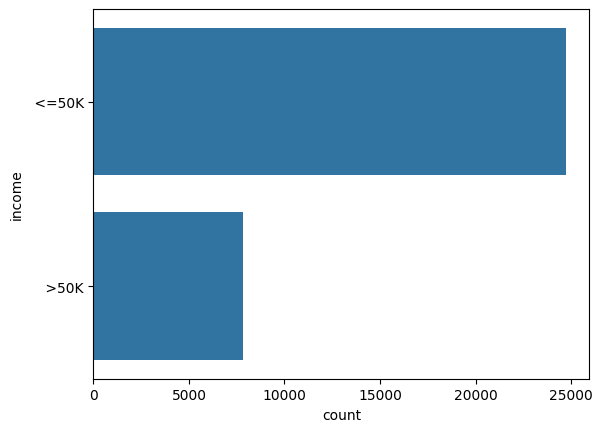

In [ ]:
sns.countplot(censo["income"]);

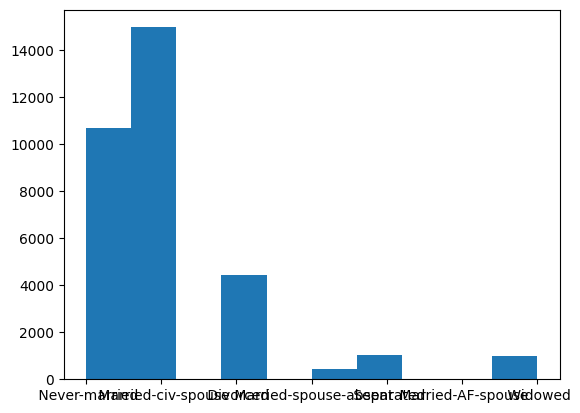

In [ ]:
plt.hist(censo['marital-status']);

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

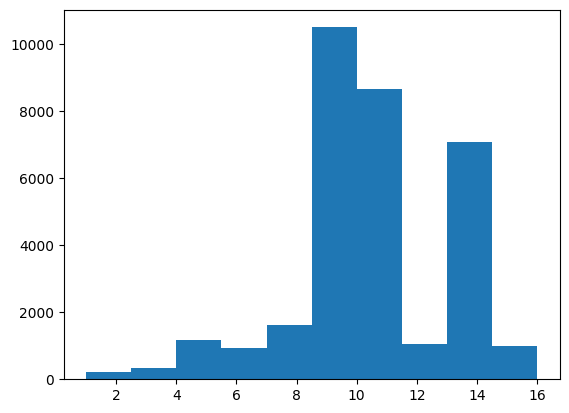

In [ ]:
plt.hist(censo["education-num"])

GRÁFICO PARA RELACIONAR A IDADE, ESTATO CIVIL, OFÍCIO E POR FINAL A RENDA. NO ESTILO CONFUSÃO PARA RELACIONAR O EIXO X COM EIXO Y.

In [ ]:
cloro = px.scatter_matrix(censo, dimensions=["age","marital-status","occupation"], color ="income")
cloro.show()

GRÁFICO DE RELAÇÕES INTRA DADOS NO ESTILO MAPA DE ARVORES. FEITO PARA RELACIONAR O EXPERIÊNCIA DE ESTUDOS E RELAÇÕES PESSOAIS.

In [ ]:
maptree = px.treemap(censo, path=["education-num", "relationship"])
maptree.show()

In [ ]:
censo

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


GRÁFICO DE CATEGORIAS PARALELAS  PARA RELACIONAR O OFÍCIO , RELAÇÃO PESSOAL E A RENDA

In [ ]:
np.unique(censo['native-country'])

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [ ]:
categoria = px.parallel_categories(censo, dimensions=["occupation", "relationship", "income"])
categoria.show()

# SEPARAÇÃO DE VARIAVEIS DE PREVISÃO E CLASSES

In [ ]:
prev_X = censo.iloc[:, 0:14].values
prev_X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
class_y = censo.iloc[:, 14].values
class_y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## TRATAMENTO DOS DADOS PARA ENCAIXE NO ALGORITIMO

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbe = LabelEncoder()
workclass = lbe.fit_transform(prev_X[:, 1])

In [ ]:
workclass

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

# TRANFORMANDO AS ETIQUETAS EM CÓDIGOS, AFINAL O ALGORITIMO TRABALHO APENAS COM VARIAVÉIS NUMÉRICAS

In [ ]:
education = lbe.fit_transform(prev_X[:, 3])
marital_status = lbe.fit_transform(prev_X[:, 5])
occupation = lbe.fit_transform(prev_X[:, 6])
relationship = lbe.fit_transform(prev_X[:, 7])
race = lbe.fit_transform(prev_X[:, 8])
sex = lbe.fit_transform(prev_X[:, 9])
native_country= lbe.fit_transform(prev_X[:, 13])
prev_X[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
prev_X[:, 1] = workclass
prev_X[:, 3] = education
prev_X[:, 5] = marital_status
prev_X[:, 6] = occupation
prev_X[:, 7] = relationship
prev_X[:, 8] = race
prev_X[:, 9] = sex
prev_X[:, 13] = native_country
prev_X[0]


array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

# ORGANIZANDO O PESO DAS VARIAVÉIS PARA TODOS TEREM O MESMO PESO


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# TRANFORMANDO AS VÁRIAIS ETIQUETAS CODIFICADAS EM COLUNAS DIFERENTES

In [ ]:
ohe_censo = ColumnTransformer(transformers =[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder= "passthrough")

In [ ]:
prev_X = ohe_censo.fit_transform(prev_X).toarray()

In [ ]:
prev_X.shape

(32561, 108)

In [ ]:
pd.crosstab(censo['income'], censo['race'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,275,763,2737,246,20699
>50K,36,276,387,25,7117


# ESCALONAMENTO DOS VALORES

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_censo = StandardScaler()

In [ ]:
prev_X = scaler_censo.fit_transform(prev_X)
prev_X

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

# DIVISÃO ENTRE TESTE E TRENAMENTO


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test , X_train, Y_test, Y_train = train_test_split(prev_X, class_y, test_size= 0.15, random_state=0)

In [ ]:
X_test.shape, X_train.shape

((27676, 108), (4885, 108))

In [ ]:
Y_test.shape, Y_train.shape

((27676,), (4885,))

# TREINAMENTO NAIVE BAYES



In [ ]:
import pickle

In [ ]:
with open('Censo.pkl', mode='rb') as f:
  X_test,X_train,Y_train,Y_test = pickle.load(f)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_test.shape, Y_test.shape

((4885, 108), (4885,))

In [ ]:
Naive_censo = GaussianNB()
Naive_censo.fit(X_train, Y_train)
prev_data = Naive_censo.predict(X_test)
prev_data

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
Y_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(Y_test,prev_data )

0.4767656090071648

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

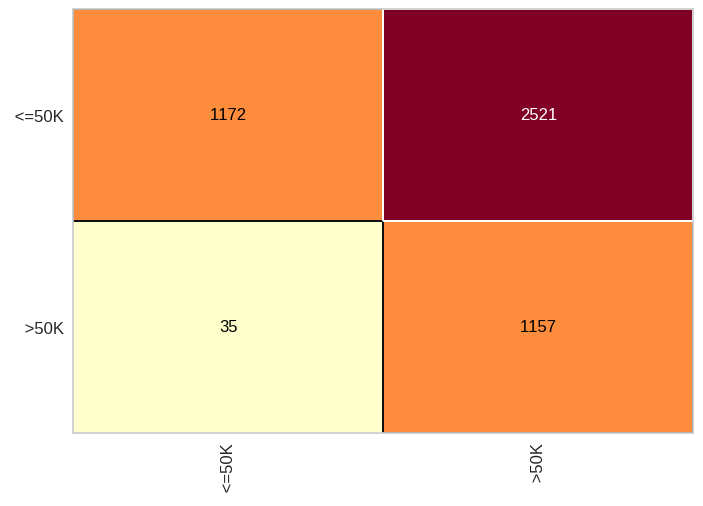

In [ ]:
cm = ConfusionMatrix(Naive_censo)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)


In [ ]:
print(classification_report(Y_test, prev_data))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# TREINAMENTO ARVORES DE DECISÃO

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
censo_tree = DecisionTreeClassifier(criterion = "entropy", random_state=0)
censo_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

CPU times: user 10.4 s, sys: 374 ms, total: 10.8 s
Wall time: 11.6 s


[Text(0.5112669640554626, 0.9905660377358491, 'x[27] <= 0.08\nentropy = 0.795\nsamples = 27676\nvalue = [21027, 6649]'),
 Text(0.19099149959561004, 0.9716981132075472, 'x[105] <= 0.812\nentropy = 0.345\nsamples = 14973\nvalue = [14008, 965]'),
 Text(0.12818795496793883, 0.9528301886792453, 'x[104] <= 0.94\nentropy = 0.28\nsamples = 14710\nvalue = [13998, 712]'),
 Text(0.06197748268303499, 0.9339622641509434, 'x[102] <= -0.886\nentropy = 0.165\nsamples = 11845\nvalue = [11558, 287]'),
 Text(0.009759620692042429, 0.9150943396226415, 'x[106] <= 5.695\nentropy = 0.031\nsamples = 4645\nvalue = [4630, 15]'),
 Text(0.00928062090347593, 0.8962264150943396, 'x[107] <= 0.329\nentropy = 0.028\nsamples = 4643\nvalue = [4630, 13]'),
 Text(0.00514924772708987, 0.8773584905660378, 'x[52] <= 2.11\nentropy = 0.013\nsamples = 4172\nvalue = [4167, 5]'),
 Text(0.003592498414248747, 0.8584905660377359, 'x[2] <= 1.777\nentropy = 0.011\nsamples = 4170\nvalue = [4166, 4]'),
 Text(0.0019159991542659982, 0.8396

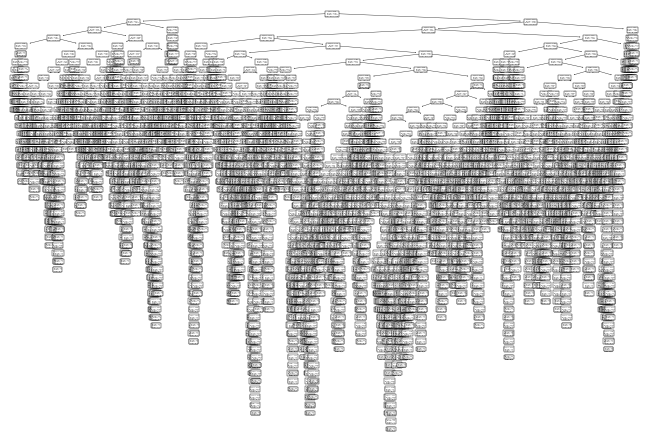

In [ ]:
%%time
tree.plot_tree(censo_tree);

In [ ]:
censo_tree.feature_importances_

array([1.20213917e-03, 4.46108359e-03, 4.65878079e-03, 0.00000000e+00,
       8.10772771e-03, 5.62731545e-03, 8.91361799e-03, 6.46988967e-03,
       0.00000000e+00, 1.25138147e-04, 3.34080383e-04, 6.66614498e-04,
       1.97527186e-04, 1.13116104e-04, 3.17713267e-04, 5.40804933e-04,
       1.34356066e-03, 2.24792738e-03, 1.85882194e-03, 2.40177153e-04,
       4.56757023e-03, 2.24876620e-03, 5.12648142e-04, 5.21940228e-04,
       3.66005593e-03, 2.32712195e-03, 3.02251288e-04, 1.93033085e-01,
       6.66742393e-04, 2.90615169e-03, 1.24249711e-03, 1.05754668e-03,
       1.38231483e-03, 6.87077257e-03, 0.00000000e+00, 6.12008936e-03,
       9.16046644e-03, 3.46973461e-03, 1.76084892e-03, 4.97939433e-03,
       4.30354831e-03, 0.00000000e+00, 7.06968517e-03, 3.71417873e-03,
       7.55312756e-03, 4.11078921e-03, 6.45934472e-03, 1.88515154e-03,
       3.57526819e-03, 8.54846563e-04, 5.90946826e-04, 1.21866278e-03,
       4.08223635e-03, 8.22346642e-04, 2.63931528e-03, 3.98315075e-03,
      

In [ ]:
pred=censo_tree.predict(X_test)

In [ ]:
np.unique(pred, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([3682, 1203]))

In [ ]:
np.unique(Y_test, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([3693, 1192]))

0.8102354145342886

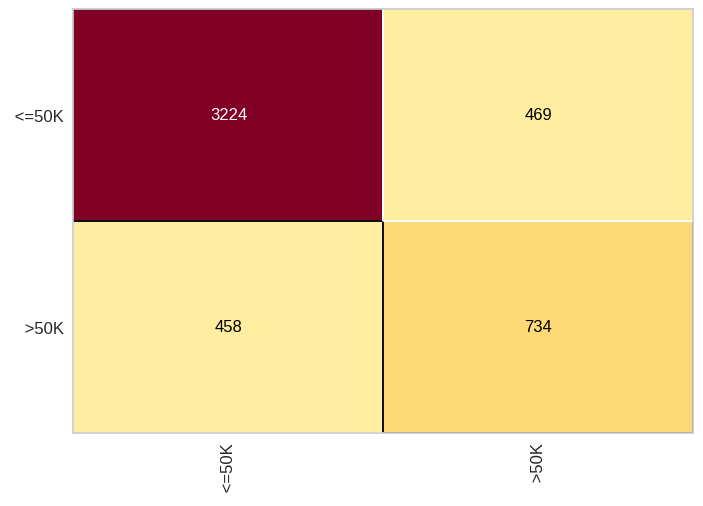

In [ ]:
cm = ConfusionMatrix(censo_tree)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

In [ ]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.62      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# APLICAÇÃO RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier( n_estimators=200,criterion="entropy", random_state=0)
RFC.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
pred_rfc=RFC.predict(X_test)

In [ ]:
np.unique(pred_rfc, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([3876, 1009]))

In [ ]:
np.unique(Y_test, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([3693, 1192]))

In [ ]:
accuracy_score(Y_test, pred_rfc)

0.8507676560900717

0.8501535312180143

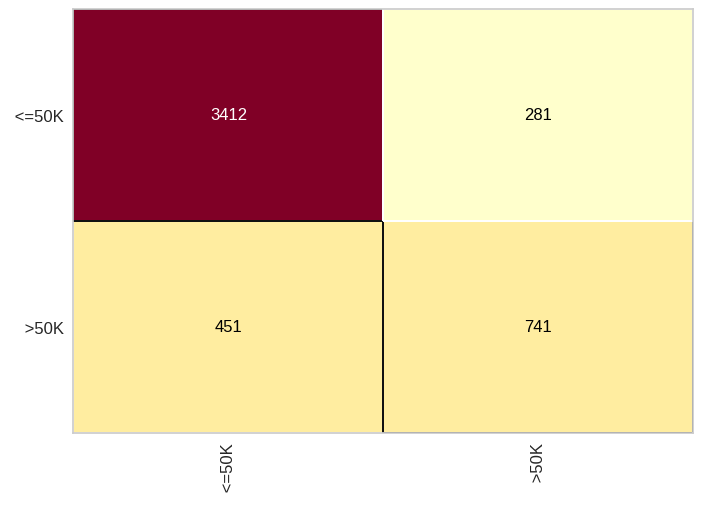

In [ ]:
cm2 = ConfusionMatrix(RFC)
cm2.fit(X_train, Y_train)
cm2.score(X_test, Y_test)

In [ ]:
!pip install Orange3

# ALGORITMO DE APRENDIZAGEM POR REGRAS

In [ ]:
import Orange
regra_censo = Orange.data.Table("/content/census_regras.csv")

In [ ]:
regra_censo.domain


[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

SEPARAÇÃO DA AMOSTRA DE TESTE E TREINAMENTO


In [ ]:
regra_censo = Orange.evaluation.testing.sample(regra_censo, n = 0.15)

In [ ]:
regra_censo

([[35, ?, 35854, Some-college, 10, ... | <=50K],
  [50, Private, 285200, Some-college, 10, ... | >50K],
  [30, Private, 151967, Some-college, 10, ... | <=50K],
  [43, Private, 233130, Some-college, 10, ... | <=50K],
  [18, Local-gov, 155905, Masters, 14, ... | <=50K],
  ...
 ],
 [[38, Private, 131461, 9th, 5, ... | <=50K],
  [32, Private, 160362, Some-college, 10, ... | <=50K],
  [52, Private, 169785, Some-college, 10, ... | <=50K],
  [33, Private, 217460, HS-grad, 9, ... | >50K],
  [32, Private, 193285, HS-grad, 9, ... | <=50K],
  ...
 ])

In [ ]:
train = regra_censo[1]
test = regra_censo[0]

In [ ]:
len(train) , len(test)

(27677, 4884)

TREINAMENTO DO ALGORITMO | POR CONTA DA SIMPLICIDADE DE FUNCIONAMENTO, ESSE MÉTODO NÃO É RECOMENDADO PARA BASES DE DADOS MUITO EXTENSAS, O RISCO É DE DEMORAR DEMAIS PARA COMPLETAR A FUNÇÃO

In [ ]:
%%time

cn2 = Orange.classification.rules.CN2Learner()
rule_app = cn2(train)

CPU times: user 25min 3s, sys: 4.75 s, total: 25min 7s
Wall time: 25min 21s


In [ ]:
for i in rule_app.rule_list:
  print(i)

In [ ]:
prev = Orange.evaluation.testing.TestOnTestData(train, test, [lambda testdata: regra_censo])
prev

In [ ]:
Orange.evaluation.CA(prev)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
census_mj = Orange.data.Table('/content/census_regras.csv')

NameError: name 'Orange' is not defined

In [ ]:
mj = Orange.classification.MajorityLearner()

NameError: name 'Orange' is not defined

In [ ]:
pred = Orange.evaluation.testing.TestOnTestData(census_mj, census_mj, [mj])

In [ ]:
Orange.evaluation.CA(pred)

In [ ]:
import pickle
with open ('census.pkl', 'rb') as f:
   X_credit_treinamento,Y_credit_treinamento,X_credit_test,Y_credit_test = pickle.load(f)

In [ ]:
X_test = X_credit_test
X_train = X_credit_treinamento
Y_test = Y_credit_test
Y_train = Y_credit_treinamento

In [ ]:
X_train.shape, Y_train.shape

((27676, 108), (27676,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=20, metric='minkowski',p=2)

In [ ]:
Knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
Knn_pred = Knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test,Knn_pred)

0.8298874104401228

0.8298874104401228

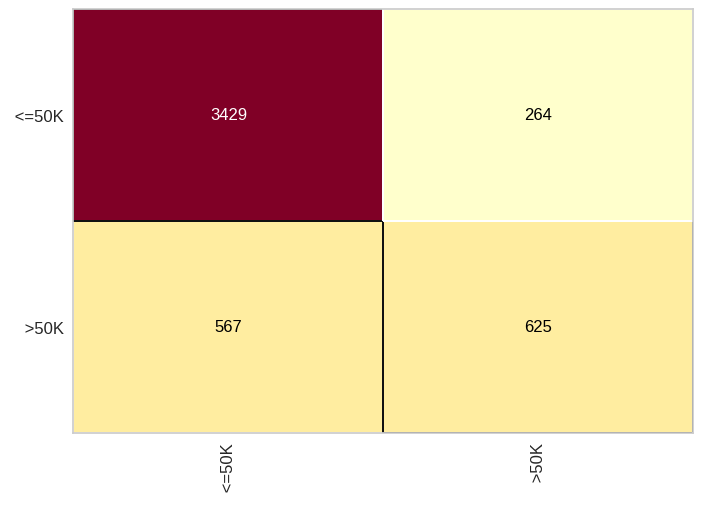

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(Knn)
cm.fit(X_train, Y_train)
cm.score(X_test,Y_test)

In [ ]:
print(classification_report(Y_test,Knn_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.70      0.52      0.60      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.73      0.75      4885
weighted avg       0.82      0.83      0.82      4885

